### Histogramm example
Example's idea taken from https://github.com/rdp/ruby_gnuplot/blob/master/examples/histogram.rb .

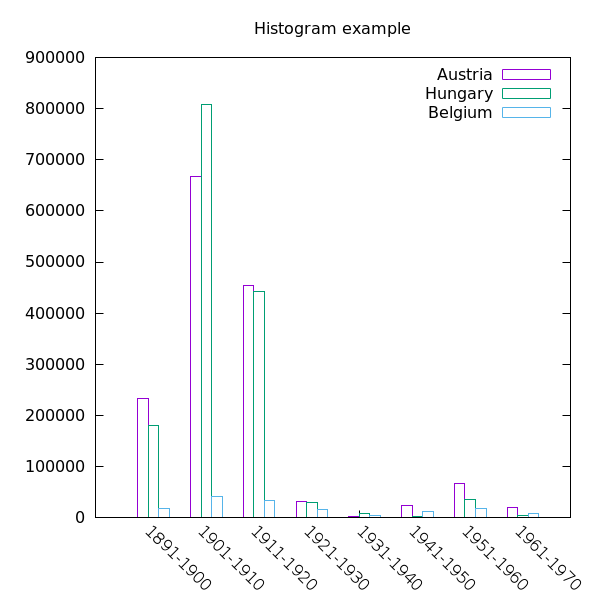

In [1]:
require 'gnuplotrb'
include GnuplotRB

titles = %w{decade Austria Hungary  Belgium}

data = [
    ['1891-1900',  234081,  181288,  18167],
    ['1901-1910',  668209,  808511,  41635],
    ['1911-1920',  453649,  442693,  33746],
    ['1921-1930',  32868,   30680,   15846],
    ['1931-1940',  3563,    7861,    4817],
    ['1941-1950',  24860,   3469,    12189],
    ['1951-1960',  67106,   36637,   18575],
    ['1961-1970',  20621,   5401,    9192],
]

x = data.map(&:first)
datasets = (1..3).map do |col|
  y = data.map { |row| row[col] }
  Dataset.new([x, y], using: '2:xtic(1)', title: titles[col], file: true)
end

histogramm = Plot.new(
  *datasets,
  title: 'Histogram example',
  style: 'data histograms',
  xtics: 'nomirror rotate by -45',
  term: ['pngcairo', size: [600, 600]]
)

The same data may be also plotted in another form.

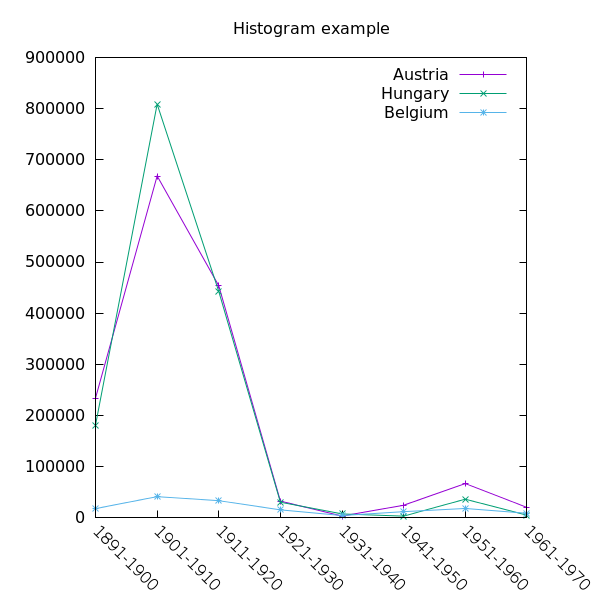

In [2]:
histogramm.style('data linespoints')

#### Set fill with multi word option key

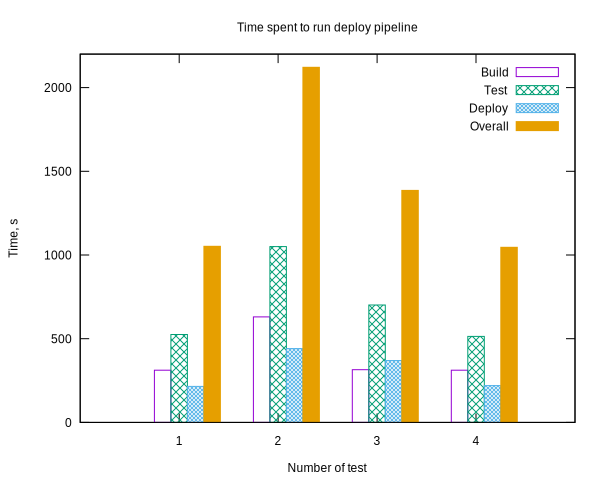

In [3]:
titles = %w{decade Build Test Deploy Overall}
data = [
    [1,  312, 525,  215, 1052],
    [2,  630, 1050, 441, 2121],
    [3,  315, 701,  370, 1386],
    [4,  312, 514,  220, 1046]
]
x = data.map(&:first)
datasets = (1..4).map do |col|
    y = data.map { |row| row[col] }
    Dataset.new([x, y], using: '2:xtic(1)', title: titles[col], file: true)
end

Plot.new(
    *datasets,
    style_data: 'histograms',
    style_fill: 'pattern border',
    yrange: 0..2200,
    xlabel: 'Number of test',
    ylabel: 'Time, s',
    title: 'Time spent to run deploy pipeline'
)